<a href="https://colab.research.google.com/github/yankikalfa/MGTF-405-Business-Forecasting/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 2 TA Notes: 
#Stationarity, ARMA Models, Seasonality and Trends

###Author: S. Yanki Kalfa

###Contact: Yanki.Kalfa@rady.ucsd.edu


## Stationarity and ADF Tests

The definiton of a White Noise is given by the following:
* $ E[e_t] = 0$
* $Var(e_t) = \sigma^2$
* $ E[e_te_s] = 0$ for all $t\neq s$

The above criteria means that the series has 0 mean, a constant variance, and an autocovariave of 0.

The definition of White Noise (WN) is similar to how we define a covariance stationary series. A covariance stationary process has a mean, variance, and auto-covariace that does not depend on time. Because we are interested in empirics we are going to apply this to real data.

We will use the Goyal Welch Database:

https://drive.google.com/file/d/1ACbhdnIy0VbCWgsnXkjcddiV8HF4feWv/view?usp=sharing

Please include this dataset in your google drive, and do not forget to mount your drive to Colab.

In [1]:
! pip install statsmodels -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import statsmodels as sm
sm.__version__

'0.13.2'

In [27]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_excel('/content/drive/MyDrive/MGTF 405/PredictorData2021.xlsx', parse_dates=True)

In [71]:
df['yyyymm'] = pd.to_datetime(df['yyyymm'],format='%Y%m', errors='coerce')

In [72]:
df.set_index('yyyymm',inplace=True)
df.head()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1937-05-01,16.26,0.810000,1.15000,0.489382,0.0041,0.0333,0.0484,0.0282,0.028278,0.0006,0.006993,0.0053,0.0040,0.003593,0.003398,-0.005699,-0.011686
1937-06-01,15.40,0.840000,1.17000,0.504961,0.0036,0.0328,0.0493,0.0285,0.031266,0.0003,0.000000,-0.0018,0.0053,0.002984,0.004206,-0.053803,-0.057853
1937-07-01,16.98,0.816667,1.18667,0.464649,0.0028,0.0325,0.0491,0.0277,0.027225,0.0003,0.006944,0.0138,0.0039,0.002982,0.003630,0.098991,0.098012
1937-08-01,16.04,0.793333,1.20333,0.481935,0.0029,0.0324,0.0492,0.0286,0.031064,0.0002,0.000000,-0.0104,-0.0017,0.002141,0.003325,-0.051183,-0.056291
1937-09-01,13.76,0.770000,1.22000,0.553147,0.0031,0.0328,0.0516,0.0284,0.035847,0.0004,0.006897,0.0045,0.0025,0.015821,0.003339,-0.139610,-0.143683


This dataset comes with 17 variables, the description is given in the original paper. We will focus on the variables called 'Index'.

Before we run any models we would like to know if our variables of interest contains a unit root, meaning if is non-stationary. If our variable is non-stationary, we will have to difference it. Once we get the variable to be stationary we know that it is predictable.


First let's look at the Auto-Correlation and Partial Auto-Correlation functions of our varible, then let's test if these autocorrelations are significant.

In [75]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16,8))

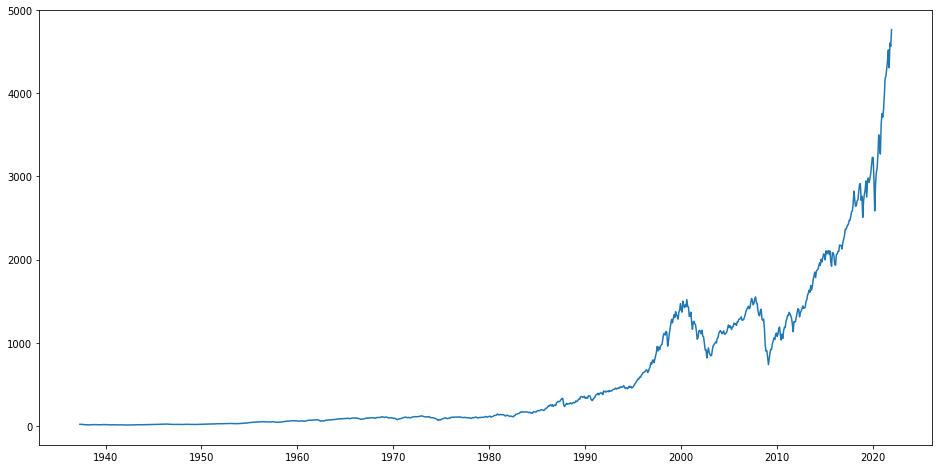

In [76]:
plt.plot(df['Index'])

$E[y_ty_{t-1}]; E[y_ty_{t-2}]; E[y_ty_{t-3}]; E[y_t,y_{t-12}]$;...

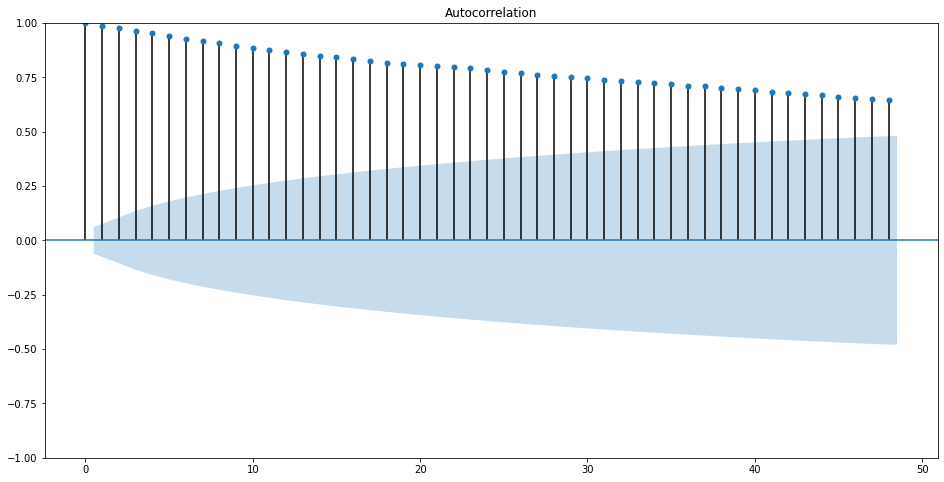

In [79]:
sm.graphics.tsa.plot_acf(df['Index'].squeeze(), lags=48)
plt.show()

Because our data is monthly, we graphed the ACF including 24 lags. It appears that all autocorrelations seem to be close 1. This is a sign that our variable is highly persitent.

Now let's look at the partial autocorrelation function (PACF).

$y_t= \phi y_{t-1}$

$y_t= \phi y_{t-1} + \phi_2 y_{t-2}$

$y_t= \phi y_{t-1} + \phi_2 y_{t-2}+ \phi_3 y_{t-3}$


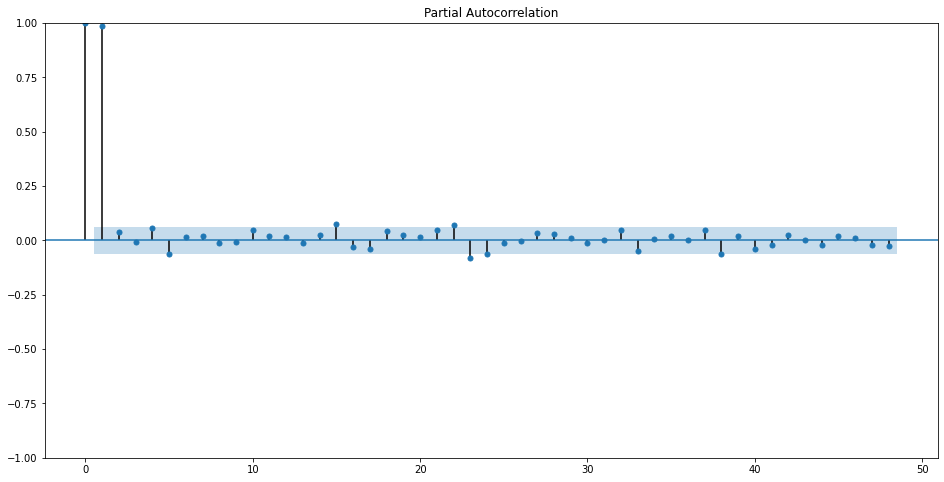

In [81]:
sm.graphics.tsa.plot_pacf(df['Index'].squeeze(), lags=48)
plt.show()

It appears that the first partial autocorrelation is very persistent, and the second seem to be outside of the confidence bounds as well.

We can now test if the autocorrelations are statistically significant, we will use the Ljung Box Test.

In [12]:
sm.stats.acorr_ljungbox(df['Index'], lags=[1], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,992.181555,8.989190e-218,989.257641,3.884008e-217


In [13]:
sm.stats.acorr_ljungbox(df['Index'], lags=[12], return_df=True,boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
12,10505.181766,0.0,10420.299509,0.0


The above results show that the first and the 12th lag are significantly different than zero. Therefore, the 'Index' is a very highly persistent series.

At this point you should get the idea that our variable has a unit root (non-stationary). We will now implement the Augmented Dickey-Fuller test to formally show that our variable is non-stationary.

$y_t = \alpha + \phi y_{t-1} + e_t$

In [14]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,x):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, regression=x,autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

The above is a general function that returns the result of an ADF test regardless of the series chosen. The function takes two arguments: the series and the deterministic part of the ADF regression. This is important because we need to know the right specification of the regression. As a rule of thumb I try to provide all possible test outcomes as a robustness check.

In [15]:
# No Constant in the ADF test
adf_test(df['Index'],'nc')

Results of Dickey-Fuller Test:
Test Statistic                   4.492877
p-value                          1.000000
#Lags Used                      22.000000
Number of Observations Used    993.000000
Critical Value (1%)             -2.567995
Critical Value (5%)             -1.941274
Critical Value (10%)            -1.616555
dtype: float64


In [16]:
# Constant in the ADF test
adf_test(df['Index'],'c')

Results of Dickey-Fuller Test:
Test Statistic                   4.235943
p-value                          1.000000
#Lags Used                      22.000000
Number of Observations Used    993.000000
Critical Value (1%)             -3.436953
Critical Value (5%)             -2.864455
Critical Value (10%)            -2.568322
dtype: float64


In [17]:
# Constant and Trend in the ADF test
adf_test(df['Index'],'ct')

Results of Dickey-Fuller Test:
Test Statistic                   3.404840
p-value                          1.000000
#Lags Used                      22.000000
Number of Observations Used    993.000000
Critical Value (1%)             -3.967916
Critical Value (5%)             -3.414921
Critical Value (10%)            -3.129658
dtype: float64


We ran the ADF test three times to include different specifications of the ADF test. In none of the tests we were able to reject the null hypothesis of non-stationarity. Therefore, we conclude that our series definitely is  non-stationary.

This means that we need to difference our variable to get it to be stationary.

Test if $(1-\phi)$=0

If we do not reject the bove hypothesis, it must be that:

$1-\phi =0 \equiv \phi =1$

In [19]:
import numpy as np

In [84]:
df['index'] = np.log(df['Index'])
df['Dindex'] = df['index'].diff()

We run an ADF test including a constant term in the regression to see if the series needs to be differenced twice.

$\Delta y_t = \alpha + \beta \Delta y_{t-1}$

In [21]:
adf_test(df['Dindex'].iloc[1:],'c')

Results of Dickey-Fuller Test:
Test Statistic                -1.276157e+01
p-value                        8.122255e-24
#Lags Used                     5.000000e+00
Number of Observations Used    1.009000e+03
Critical Value (1%)           -3.436848e+00
Critical Value (5%)           -2.864409e+00
Critical Value (10%)          -2.568297e+00
dtype: float64


We reject the null hypothesis of non-stationarity. Therefore it is enough to difference our variable once. We can also call the 'Index' variable an I(1) variable. Meaning that we only need to difference it once to get it to be stationary.

Now that we have stationary series that we can forecast, we are going to use ARMA.

In [22]:
import statsmodels
import itertools

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
def AIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any value between 0 and 2
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
      try:
          mod = ARIMA(df,
                      order=comb,
                      enforce_stationarity=True,
                      enforce_invertibility=True)
          
          output = mod.fit()
          ans.append([comb, output.aic])
          print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.aic))
      except:
        continue
# Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
    print(ans_df.loc[ans_df['aic'].idxmin()])
    return ans_df

In [25]:
def BIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any user defined value. We need to be careful with integration order,
# cannot be 0.
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
# Run a grid with pdq and seasonal pdq parameters calculated above and get #the best AIC value
    ans = []
    for comb in pdq:
      try:
          mod = ARIMA(df,
                      order=comb,
                      enforce_stationarity=True,
                      enforce_invertibility=True)
          
          output = mod.fit()
          ans.append([comb, output.aic])
          print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.bic))
      except:
        continue
# Find the parameters with minimal AIC value
    ans_df = pd.DataFrame(ans, columns=['pdq', 'bic'])
    print(ans_df.loc[ans_df['bic'].idxmin()])
    return ans_df


In [39]:
AIC_PDQ(df['Dindex'].iloc[1:],3,1,2)

pdq     (0, 0, 0)
aic   -3389.77733
Name: 0, dtype: object


,pdq,aic
0,"(0, 0, 0)",-3389.777330
1,"(0, 0, 1)",-3387.853784
2,"(1, 0, 0)",-3387.855121
3,"(1, 0, 1)",-3385.783438
4,"(2, 0, 0)",-3385.922040
5,"(2, 0, 1)",-3383.929844


In [29]:
BIC_PDQ(df['Dindex'].iloc[1:],3,1,2)

pdq     (0, 0, 0)
bic   -3389.77733
Name: 0, dtype: object


,pdq,bic
0,"(0, 0, 0)",-3389.777330
1,"(0, 0, 1)",-3387.853784
2,"(1, 0, 0)",-3387.855121
3,"(1, 0, 1)",-3385.783438
4,"(2, 0, 0)",-3385.922040
5,"(2, 0, 1)",-3383.929844


We tested the combination of AR and MA parameters, both AIC and BIC gives us the same answer. The best model appears to be an ARMA(0,0). Now, let's go ahead and forecasts the last 10 years with our ARMA(0,0) model.



$\Delta y_t =\alpha + e_t $

$y_{t} = \alpha + 1 \times y_{t-1} + e_t$

$\Delta y_t \equiv y_t - y_{t-1}$


In [85]:
df_train = df.iloc[1:1008,]
df_test = df.iloc[1008:,]

In [86]:
mod_h10 = ARIMA(df_train['Dindex'], order=(0,0,0))
mod_h10_res = mod_h10.fit()
mod_h10_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Dindex   No. Observations:                 1007
Model:                          ARIMA   Log Likelihood                1681.782
Date:                Fri, 30 Sep 2022   AIC                          -3359.564
Time:                        21:00:01   BIC                          -3349.735
Sample:                    06-01-1937   HQIC                         -3355.830
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.002      3.611      0.000       0.003       0.008
sigma2         0.0021   5.39e-05     38.500      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1033.55
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.87
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
h10_fit = mod_h10_res.predict()

In [89]:
import seaborn as sns

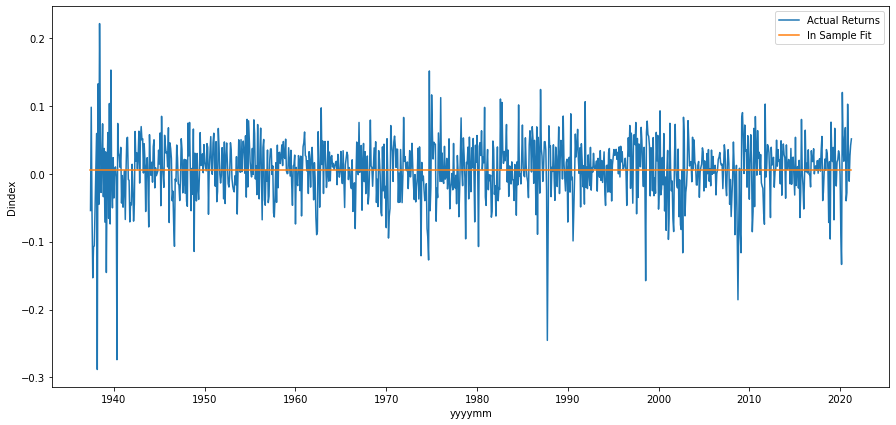

In [36]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_train['Dindex'],label = 'Actual Returns')
sns.lineplot(data=h10_fit, label = 'In Sample Fit')
plt.legend()
plt.show()

This is how our model fits the data. It is clear that we are not picking up all the variations in the data. However, it is clear that this the series has mean. Let's produce 10 yr forecasts now.

In [90]:
start = len(df_train)
end = len(df)-2
h10_forecast = pd.DataFrame(mod_h10_res.predict(start=start, end=end, dynamic=False,
                                          typ='levels').rename('oos_forecast'))

In [91]:
h10_forecast.set_index(df_test.index.copy(),inplace=True)
df_test['f_h10'] = h10_forecast['oos_forecast']

In [92]:
df_test

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,index,Dindex,f_h10
yyyymm,,,,,,,,,,,,,,,,,,,,
2021-05-01,4204.11,57.787824,148.573333,0.189204,0.0002,0.0296,0.0362,0.0162,0.017464,0.0000,0.008017,0.0001,0.0045,0.001496,NaN,0.006208,0.004737,8.343818,0.005472,0.005506
2021-06-01,4297.50,57.865042,158.760000,0.189352,0.0004,0.0279,0.0344,0.0152,0.017255,0.0000,0.009291,0.0284,0.0442,0.000607,NaN,0.023682,0.022564,8.365789,0.021971,0.005506
2021-07-01,4395.26,58.328189,164.296667,0.187005,0.0005,0.0257,0.0324,0.0132,0.016079,0.0000,0.004811,0.0305,0.0239,0.001124,NaN,0.024305,0.023309,8.388282,0.022493,0.005506
2021-08-01,4522.68,58.791336,169.833333,0.184756,0.0005,0.0255,0.0324,0.0128,0.014846,0.0000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205,8.416860,0.028578,0.005506
2021-09-01,4307.54,59.254483,175.370000,0.193036,0.0004,0.0253,0.0323,0.0137,0.015598,0.0000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152,8.368122,-0.048738,0.005506
2021-10-01,4605.38,59.635361,182.860000,0.182389,0.0005,0.0268,0.0335,0.0158,0.013368,0.0000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627,8.434980,0.066858,0.005506
2021-11-01,4567.00,60.016239,190.350000,0.189455,0.0005,0.0262,0.0328,0.0156,0.015640,0.0001,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008665,8.426612,-0.008369,0.005506
2021-12-01,4766.18,60.397117,197.840000,0.179786,0.0006,0.0265,0.0330,0.0146,0.012970,0.0000,0.003073,-0.0110,-0.0129,0.002518,NaN,0.043485,0.042285,8.469300,0.042689,0.005506


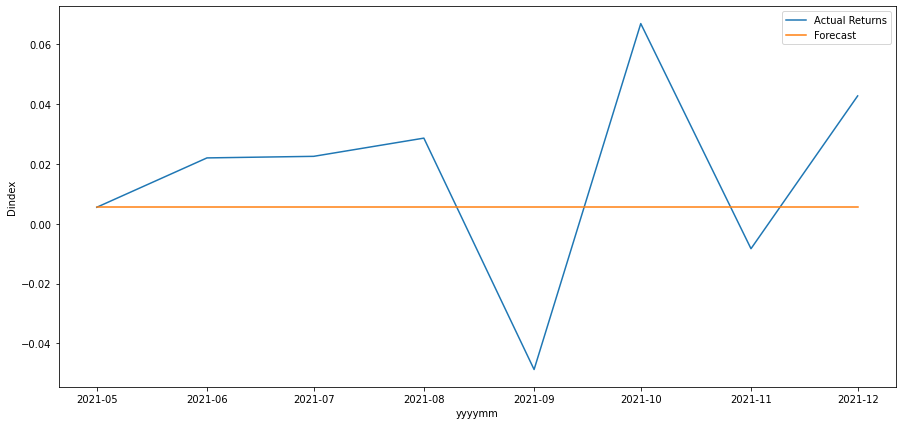

In [93]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_test['Dindex'],label = 'Actual Returns')
sns.lineplot(data=df_test['f_h10'], label = 'Forecast')
plt.legend()
plt.show()

We can see that our forecast basically is just a mean forecast. This is because when we look at the continously compounded rate of return on the SP500, any deviatoin from the mean is considered unpredictable. Hence, we say why it is very difficult to forecast stocks returns.


This is what we call efficient markets.

## Trend and Seasonality

We will look at deterministic trend and seasonality using CO2 data from the SCRIPS Institute.

In [94]:
df = pd.read_csv('//content/drive/MyDrive/MGTF 405/Keeling_CO2_data_2022.csv')

In [95]:
df.head()

,Yr,month,CO2_ppm
0,1964,5,322.25
1,1964,6,321.89
2,1964,7,320.44
3,1964,8,318.69
4,1964,9,316.71


In [96]:
df['Date']=pd.to_datetime(df.Yr.astype(str) + '/' + df.month.astype(str))
df.set_index(df['Date'],inplace=True)

In [97]:
df.asfreq('MS')

,Yr,month,CO2_ppm,Date
Date,,,,
1964-05-01,1964,5,322.25,1964-05-01
1964-06-01,1964,6,321.89,1964-06-01
1964-07-01,1964,7,320.44,1964-07-01
1964-08-01,1964,8,318.69,1964-08-01
1964-09-01,1964,9,316.71,1964-09-01
...,...,...,...,...
2021-05-01,2021,5,418.95,2021-05-01
2021-06-01,2021,6,418.70,2021-06-01
2021-07-01,2021,7,416.65,2021-07-01


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

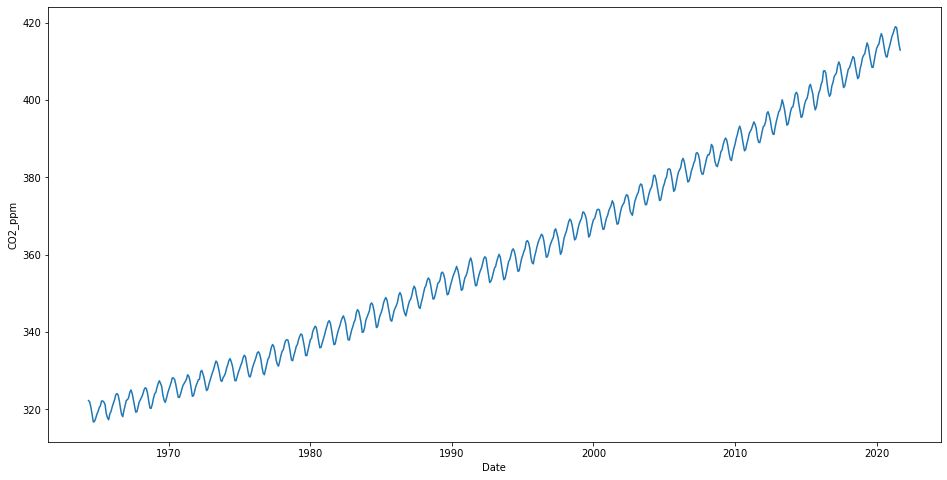

In [98]:
sns.lineplot(data= df, x='Date', y='CO2_ppm')

By visual inspection we can see that our data is trending and definitely has a seasonal component.

Let's create a 'trend' variable and estimate a simple linear trend model

In [99]:
df['trend'] = [i for i in range(1,len(df)+1)]

In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [100]:
model_trend = smf.ols(formula = 'CO2_ppm~ 1 + trend', data= df).fit()

In [101]:
model_trend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CO2_ppm   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.474e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:10:09   Log-Likelihood:                -1917.6
No. Observations:                 689   AIC:                             3839.
Df Residuals:                     687   BIC:                             3848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    312.2877      0.299   1044.926      0.000     311.701     312.874
trend          0.1399      0.001    186.389      0.000       0.138       0.141
==============================================================================
Omnibus:                       19.227   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.045
Skew:                           0.374   Prob(JB):                     7.32e-05
Kurtosis:                       2.676   Cond. No.                         797.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
df['trend_fit'] =model_trend.predict()

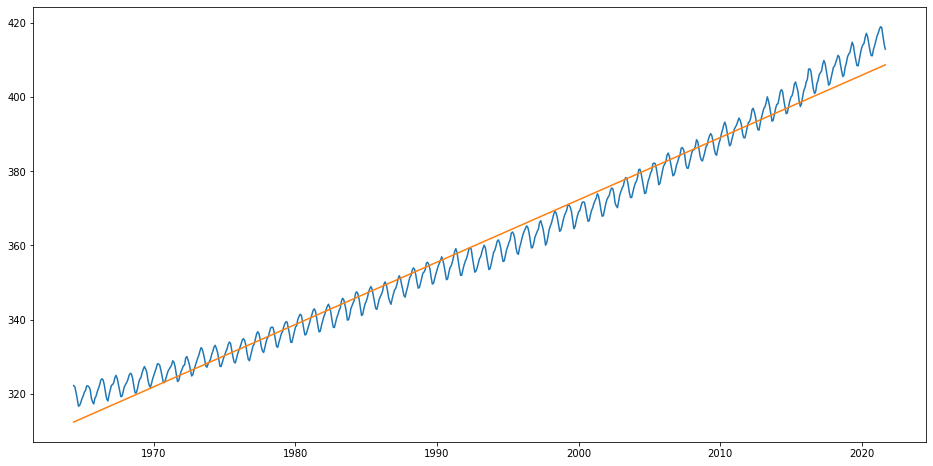

In [103]:
plt.plot(df['CO2_ppm'])
plt.plot(df['trend_fit'])

The linear trend model is somewhat capturing the trend in the CO2 data. We can also fit a quadratic trend.

In [104]:
df['trend2'] = [i**2 for i in range(1,len(df)+1)]

In [105]:
model_trend_2 = smf.ols(formula = 'CO2_ppm~ 1 + trend + trend2', data= df).fit()

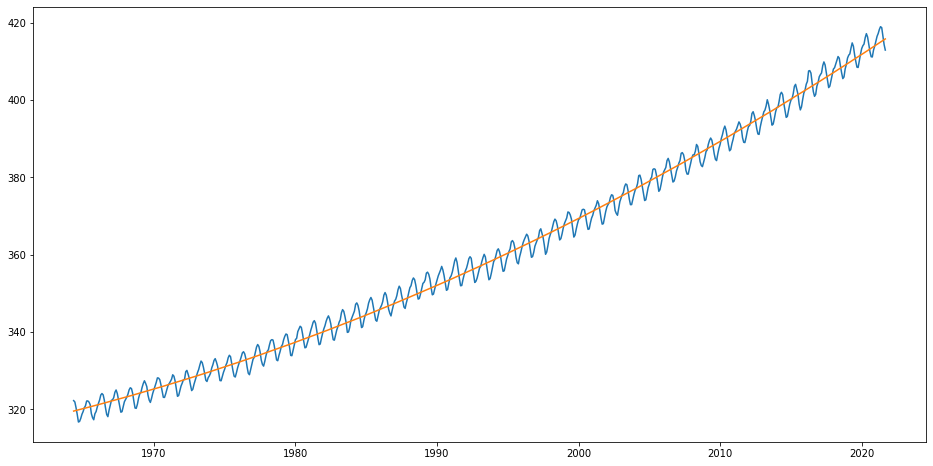

In [106]:
df['trend2_fit'] = model_trend_2.predict()
plt.plot(df['CO2_ppm'])
plt.plot(df['trend2_fit'])

With the quadratic trend, we have a better fit.

Now let's try to capture the seasonal component of our data. We will create a dummy variable for the months in our dataset.

In [107]:
season=pd.DataFrame(pd.get_dummies(df.month))
season.head(24)
season.columns= ['Jan', 'Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
season

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,
1964-05-01,0,0,0,0,1,0,0,0,0,0,0,0
1964-06-01,0,0,0,0,0,1,0,0,0,0,0,0
1964-07-01,0,0,0,0,0,0,1,0,0,0,0,0
1964-08-01,0,0,0,0,0,0,0,1,0,0,0,0
1964-09-01,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,0,0,0,0,1,0,0,0,0,0,0,0
2021-06-01,0,0,0,0,0,1,0,0,0,0,0,0
2021-07-01,0,0,0,0,0,0,1,0,0,0,0,0


In [108]:
df=pd.concat([df,season],axis=1)
df

,Yr,month,CO2_ppm,Date,trend,trend_fit,trend2,trend2_fit,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,,,,,,,,,
1964-05-01,1964,5,322.25,1964-05-01,1,312.427571,1,319.544116,0,0,0,0,1,0,0,0,0,0,0,0
1964-06-01,1964,6,321.89,1964-06-01,2,312.567452,4,319.621934,0,0,0,0,0,1,0,0,0,0,0,0
1964-07-01,1964,7,320.44,1964-07-01,3,312.707333,9,319.699933,0,0,0,0,0,0,1,0,0,0,0,0
1964-08-01,1964,8,318.69,1964-08-01,4,312.847214,16,319.778113,0,0,0,0,0,0,0,1,0,0,0,0
1964-09-01,1964,9,316.71,1964-09-01,5,312.987095,25,319.856473,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,2021,5,418.95,2021-05-01,685,408.106142,469225,414.975520,0,0,0,0,1,0,0,0,0,0,0,0
2021-06-01,2021,6,418.70,2021-06-01,686,408.246023,470596,415.176921,0,0,0,0,0,1,0,0,0,0,0,0
2021-07-01,2021,7,416.65,2021-07-01,687,408.385904,471969,415.378504,0,0,0,0,0,0,1,0,0,0,0,0


In [109]:
model_trs = smf.ols(formula='CO2_ppm ~ 1 + trend + trend2 + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data = df).fit()
model_trs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CO2_ppm   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.331e+04
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:12:06   Log-Likelihood:                -777.08
No. Observations:                 689   AIC:                             1582.
Df Residuals:                     675   BIC:                             1646.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    319.5349      0.129   2470.248      0.000     319.281     319.789
trend          0.0776      0.001    133.954      0.000       0.076       0.079
trend2       9.02e-05   8.13e-07    110.922      0.000    8.86e-05    9.18e-05
Feb            0.6523      0.141      4.612      0.000       0.375       0.930
Mar            1.3266      0.141      9.378      0.000       1.049       1.604
Apr            2.5615      0.141     18.109      0.000       2.284       2.839
May            3.0303      0.141     21.515      0.000       2.754       3.307
Jun            2.2967      0.141     16.307      0.000       2.020       2.573
Jul            0.6337      0.141      4.499      0.000       0.357       0.910
Aug           -1.5175      0.141    -10.774      0.000      -1.794      -1.241
Sep           -3.3269      0.141    -23.621      0.000      -3.603      -3.050
Oct           -3.4388      0.141    -24.310      0.000      -3.717      -3.161
Nov           -2.1445      0.141    -15.161      0.000      -2.422      -1.867
Dec           -0.9658      0.141     -6.828      0.000      -1.244      -0.688
==============================================================================
Omnibus:                       30.827   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.161
Skew:                           0.386   Prob(JB):                     3.44e-06
Kurtosis:                       2.470   Cond. No.                     2.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

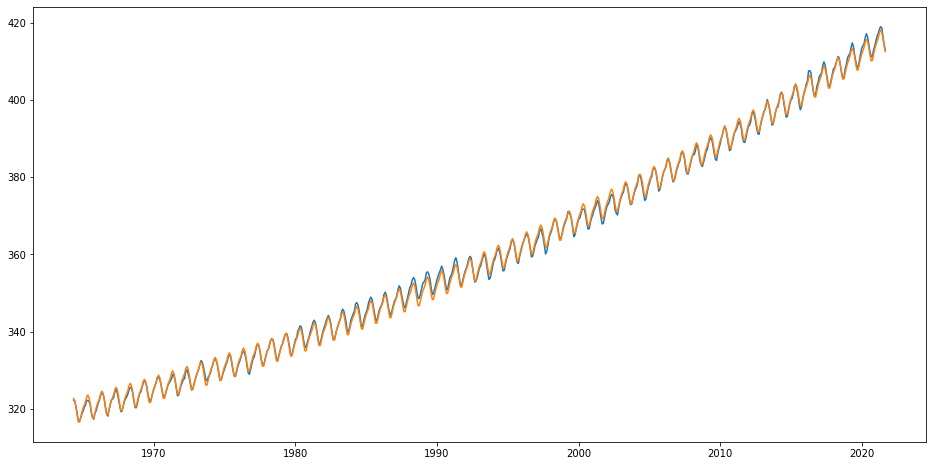

In [110]:
df['trs_fit'] =model_trs.predict()
plt.plot(df['CO2_ppm'])
plt.plot(df['trs_fit'])

We almost have a perfect fit.

In [111]:
residual_trend = df['CO2_ppm']-df['trend_fit']
residual_trend_2 = df['CO2_ppm']-df['trend2_fit']
residual_trs = df['CO2_ppm']-df['trs_fit']

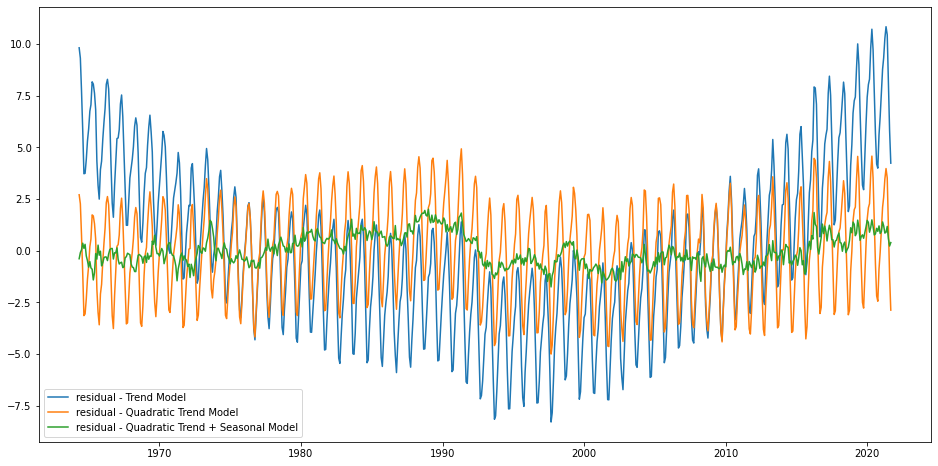

In [112]:
plt.plot(residual_trend, label = 'residual - Trend Model')
plt.plot(residual_trend_2, label = 'residual - Quadratic Trend Model') 
plt.plot(residual_trs, label = 'residual - Quadratic Trend + Seasonal Model')
plt.legend()

It is clear that the quadratic trend with seasonal components have the smallest residuals, and visually they are centered around zero. For certain periods we see that the model is underpredicting and for some others we are overpredicting. Furthermore, these over and underpredictions seem to be persistent.

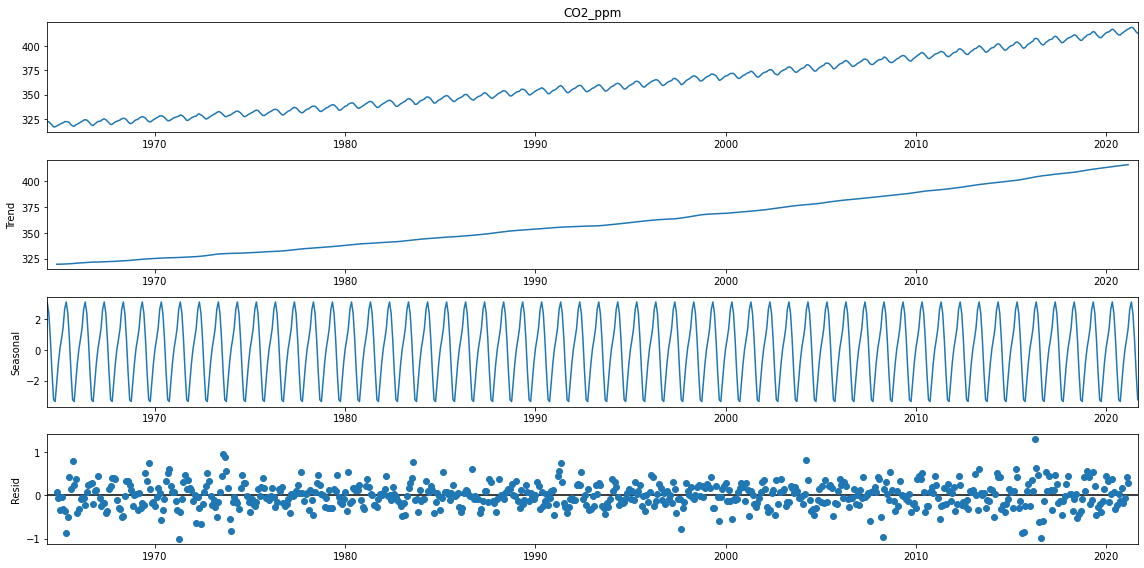

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
season_decomp =seasonal_decompose(df['CO2_ppm'], model='additive')
season_decomp.plot()
plt.show()

Seasonal decomposition is an alternative method to visually describe our data. It helps us to figure out if the trend is linear or quadratic. It also helps us see if we have a deterministic seasonal component.

### Bonus

We can create a new feature that combines linear trend, quadratic trend, and monthly dummies in one function.

In [ ]:
def new_transform(data):
    encoding = LabelBinarizer().fit_transform(data)
    feature = []
    for i in range(len(encoding)):
        a = list(encoding[i])
        a.pop(0)
        inp = [1]
        inp = inp + a
        inp.append(i+1) # linear
        inp.append((i+1)**2)  # quadratic    
        feature.append(inp)
    return feature

new_feature = new_transform([m for m in df['month']])


In [ ]:
linear_regression = sm.OLS(df['CO2_ppm'].tolist(), new_feature).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.331e+04
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:17:19   Log-Likelihood:                -777.08
No. Observations:                 689   AIC:                             1582.
Df Residuals:                     675   BIC:                             1646.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        319.5349      0.129   2470.248      0.000     319.281     319.789
x1             0.6523      0.141      4.612      0.000       0.375       0.930
x2             1.3266      0.141      9.378      0.000       1.049       1.604
x3             2.5615      0.141     18.109      0.000       2.284       2.839
x4             3.0303      0.141     21.515      0.000       2.754       3.307
x5             2.2967      0.141     16.307      0.000       2.020       2.573
x6             0.6337      0.141      4.499      0.000       0.357       0.910
x7            -1.5175      0.141    -10.774      0.000      -1.794      -1.241
x8            -3.3269      0.141    -23.621      0.000      -3.603      -3.050
x9            -3.4388      0.141    -24.310      0.000      -3.717      -3.161
x10           -2.1445      0.141    -15.161      0.000      -2.422      -1.867
x11           -0.9658      0.141     -6.828      0.000      -1.244      -0.688
x12            0.0776      0.001    133.954      0.000       0.076       0.079
x13          9.02e-05   8.13e-07    110.922      0.000    8.86e-05    9.18e-05
==============================================================================
Omnibus:                       30.827   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.161
Skew:                           0.386   Prob(JB):                     3.44e-06
Kurtosis:                       2.470   Cond. No.                     2.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

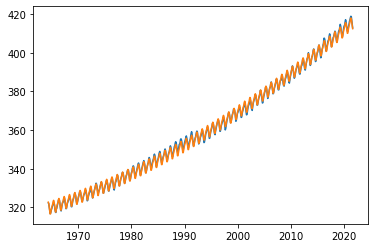

In [ ]:
df['lnreg'] = linear_regression.predict()
plt.plot(df['CO2_ppm'])
plt.plot(df['lnreg'])